#📌 Extracción

In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

#🔧 Transformación

##Conozce el conjunto de datos

In [11]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Comprobación de incoherencias en los datos

In [14]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [17]:
df['customerID'].duplicated().any()

np.False_

In [18]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [19]:
df['customer'].apply(lambda x: x.get('gender')).unique()

array(['Female', 'Male'], dtype=object)

In [20]:
df['phone'].apply(lambda x: x.get('PhoneService')).unique()

array(['Yes', 'No'], dtype=object)

Manejo de inconsistencias

In [24]:
df['Churn'] = df['Churn'].replace('', pd.NA)

In [25]:
df['Churn'].isna().sum()

np.int64(224)

In [26]:
df = df.dropna(subset=['Churn'])

In [27]:
df['Churn'].isna().sum()

np.int64(0)

In [35]:
df.head()

,customerID,Churn,customer,phone,internet,account,MonthlyCharges,Cuentas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",0.0,0.0
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",0.0,0.0
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",0.0,0.0
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",0.0,0.0
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",0.0,0.0


Columna de cuentas diarias

In [52]:
# Extraer el monto mensual real
df['MonthlyCharges'] = df['account'].apply(lambda x: float(x.get('Charges', {}).get('Monthly', 0)))

# Calcular la facturación diaria
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30


In [53]:
df.head()

,customerID,Churn,customer,phone,internet,account,MonthlyCharges,Cuentas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",65.6,2.186667
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",59.9,1.996667
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",73.9,2.463333
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",98.0,3.266667
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",83.9,2.796667


#📊 Carga y análisis

estadistica descriptiva

In [56]:
estadistica = df.describe()
estadistica

,MonthlyCharges,Cuentas_Diarias
count,7043.000000,7043.000000
mean,64.761692,2.158723
std,30.090047,1.003002
min,18.250000,0.608333
25%,35.500000,1.183333
50%,70.350000,2.345000
75%,89.850000,2.995000
max,118.750000,3.958333


estadisticas para variables categoricas

In [43]:
categoricas = df.select_dtypes(include=['object'])
categoricas

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


medianas

In [54]:
mediana = df.median(numeric_only=True)
mediana

,0
MonthlyCharges,70.350
Cuentas_Diarias,2.345


desviacion estandar

In [55]:
desviacion = df.std(numeric_only=True)
desviacion

,0
MonthlyCharges,30.090047
Cuentas_Diarias,1.003002


Distribución de evasión

<ipython-input-57-247aa9921ec4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Set2')


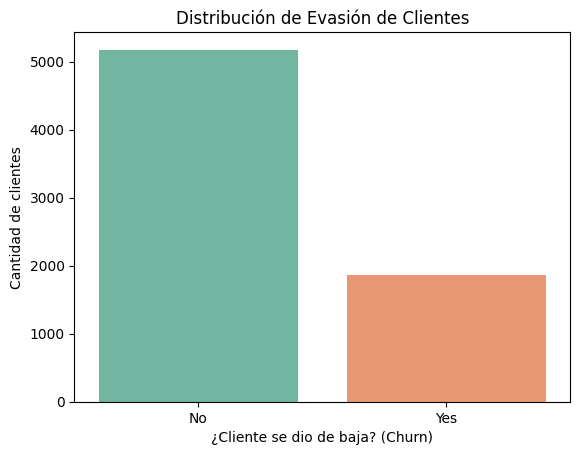

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar valores
churn_counts = df['Churn'].value_counts()

# Gráfico de barras
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Set2')
plt.title('Distribución de Evasión de Clientes')
plt.xlabel('¿Cliente se dio de baja? (Churn)')
plt.ylabel('Cantidad de clientes')
plt.show()

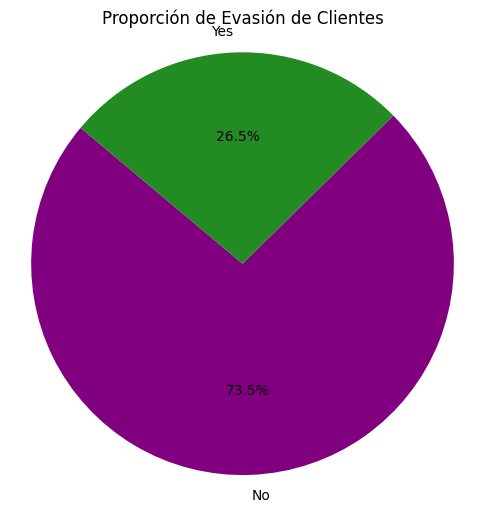

In [63]:
# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['purple','forestgreen'])
plt.title('Proporción de Evasión de Clientes')
plt.axis('equal')  # para que sea un círculo
plt.show()

Recuento de evasión por variables categóricas

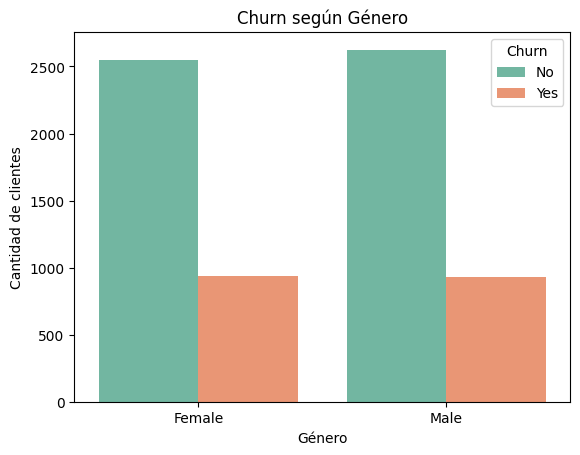

In [64]:
##genero
sns.countplot(data=df, x=df['customer'].apply(lambda x: x['gender']), hue='Churn', palette='Set2')
plt.title('Churn según Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn')
plt.show()


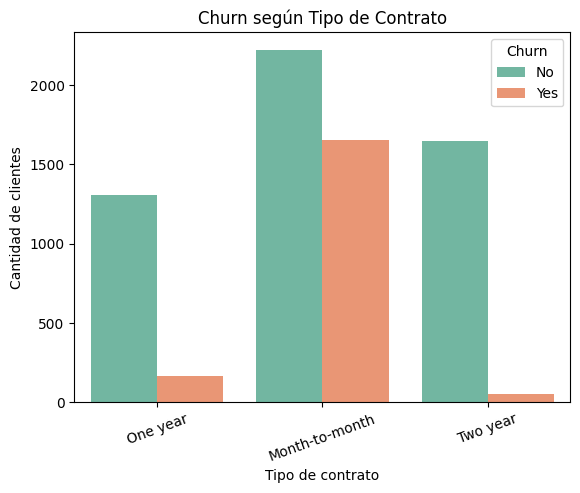

In [65]:
##contrato
sns.countplot(data=df, x=df['account'].apply(lambda x: x['Contract']), hue='Churn', palette='Set2')
plt.title('Churn según Tipo de Contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=20)
plt.legend(title='Churn')
plt.show()


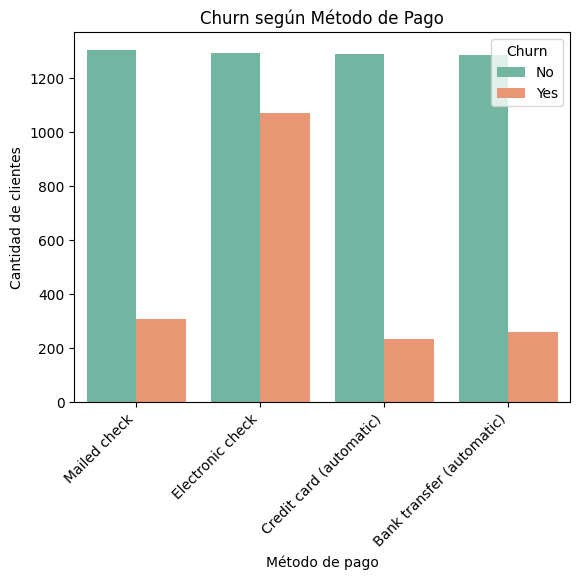

In [66]:
##pago
sns.countplot(data=df, x=df['account'].apply(lambda x: x['PaymentMethod']), hue='Churn', palette='Set2')
plt.title('Churn según Método de Pago')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.show()


Conteo de evasión por variables numéricas

In [69]:
df['account'].iloc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [72]:
# Extraer 'MonthlyCharges'
df['MonthlyCharges'] = df['account'].apply(lambda x: float(x['Charges']['Monthly']))

# Extraer 'TotalCharges', convirtiendo a float y controlando valores vacíos
def convertir_total(x):
    valor = x['Charges']['Total']
    try:
        return float(valor.strip())  # elimina espacios antes de convertir
    except:
        return pd.NA  # si falla, devuelve NA

df['TotalCharges'] = df['account'].apply(convertir_total)


In [73]:
df['TotalCharges'].isna().sum()
df[['MonthlyCharges', 'TotalCharges']].head()


,MonthlyCharges,TotalCharges
0,65.6,593.3
1,59.9,542.4
2,73.9,280.85
3,98.0,1237.85
4,83.9,267.4


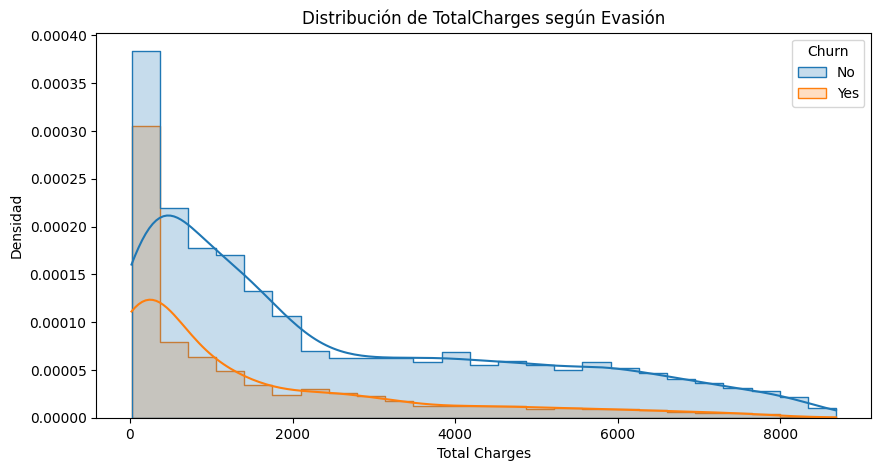

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, element='step', stat='density')
plt.title('Distribución de TotalCharges según Evasión')
plt.xlabel('Total Charges')
plt.ylabel('Densidad')
plt.show()


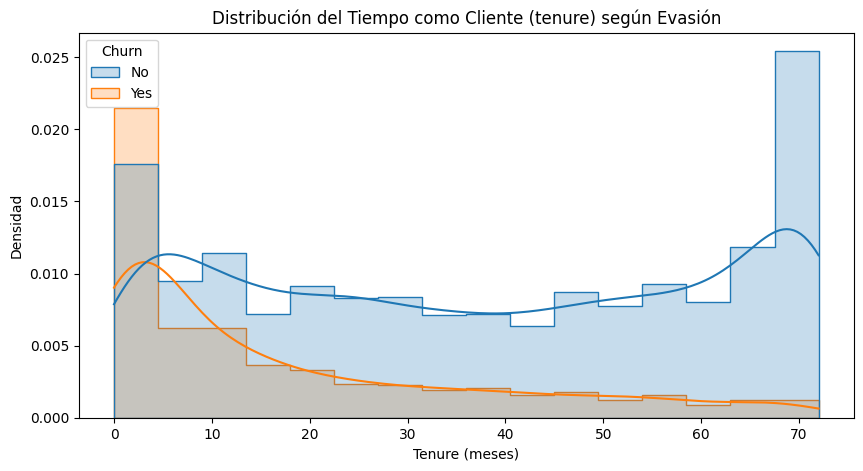

In [75]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=df['customer'].apply(lambda x: x['tenure']), hue='Churn', kde=True, element='step', stat='density')
plt.title('Distribución del Tiempo como Cliente (tenure) según Evasión')
plt.xlabel('Tenure (meses)')
plt.ylabel('Densidad')
plt.show()


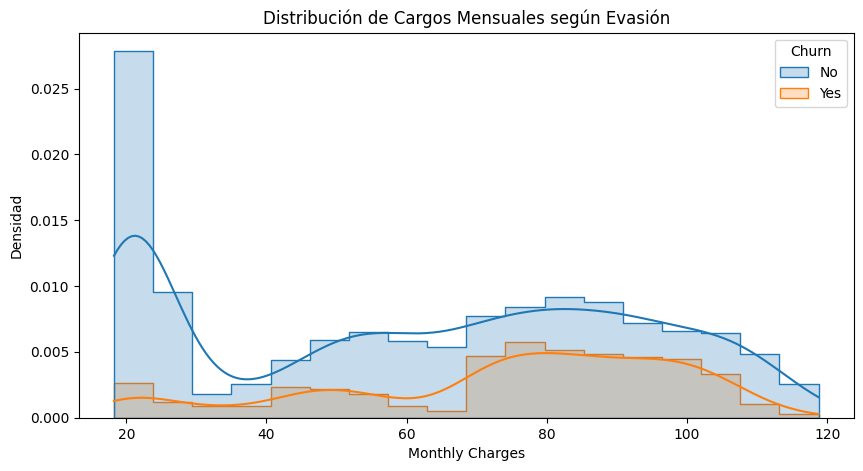

In [76]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, element='step', stat='density')
plt.title('Distribución de Cargos Mensuales según Evasión')
plt.xlabel('Monthly Charges')
plt.ylabel('Densidad')
plt.show()


#📄Informe final

1. Introducción
El análisis de evasión de clientes o churn es fundamental para Telecom X, ya que representa la pérdida de clientes y afecta directamente la rentabilidad y crecimiento de la empresa. El objetivo principal de este estudio es entender los factores que influyen en la decisión de los clientes de cancelar el servicio, utilizando variables demográficas, contractuales y financieras para descubrir patrones que permitan diseñar estrategias de retención efectivas.

2. Limpieza y Tratamiento de Datos
Los datos originales incluían información anidada en diccionarios para cada cliente, con campos como customer, phone, internet y account. Se realizó:

Extracción y transformación de campos relevantes, por ejemplo:

De account['Charges'] se obtuvieron MonthlyCharges y TotalCharges.

De account se obtuvo la variable categórica Contract.

De customer se obtuvieron gender, SeniorCitizen, tenure, entre otros.

Manejo de valores faltantes, especialmente en la variable Churn, eliminando filas con datos vacíos.

Conversión de tipos, asegurando que los campos numéricos estén en formato float.

Creación de la variable Cuentas_Diarias dividiendo MonthlyCharges entre 30 para estimar el gasto diario promedio.

3. Análisis Exploratorio de Datos (EDA)
Estadísticas descriptivas principales:
Variable	count	mean	std	min	25%	50%	75%	max
MonthlyCharges	7043	64.76	30.09	18.25	35.50	70.35	89.85	118.75
Cuentas_Diarias	7043	2.16	1.00	0.61	1.18	2.35	3.00	3.96

Distribución de la variable Churn:
Los clientes que permanecieron (No) superan en número a los que cancelaron (Yes).

Se observan diferencias relevantes en los patrones de evasión al analizar variables categóricas como Contract y PaymentMethod.

Análisis según variables categóricas:
Contrato (Contract): Los clientes con contratos de mes a mes presentan mayor tasa de evasión que aquellos con contratos anuales o bianuales.

Método de pago (PaymentMethod): Clientes que usan métodos automatizados tienen menor tendencia a cancelar.

Género (gender): No se detectan diferencias significativas entre hombres y mujeres.

Análisis de variables numéricas vs evasión:
TotalCharges: Los clientes que abandonan tienden a tener un gasto total acumulado menor.

Tenure: La mayoría de los clientes que cancelan lo hacen en los primeros meses.

MonthlyCharges y Cuentas_Diarias: Mayor gasto diario y mensual se asocia con un mayor riesgo de evasión, especialmente si el cliente no tiene un contrato a largo plazo.

4. Conclusiones e Insights
La duración del contrato es un factor crítico para reducir la evasión: contratos a largo plazo aseguran mayor retención.

Los clientes nuevos o con bajo tenure son más propensos a cancelar el servicio.

Promover pagos automáticos parece ser una medida efectiva para la fidelización.

Los clientes con menor gasto acumulado tienen mayor probabilidad de abandonar, posiblemente por menor satisfacción o uso limitado.

5. Recomendaciones Estratégicas
Incentivar a los clientes a optar por contratos anuales o bianuales mediante descuentos o promociones especiales.

Implementar campañas de bienvenida y soporte para clientes nuevos que les ayuden a incrementar su tiempo de permanencia (tenure).

Promover el uso de métodos de pago automatizados para mejorar la retención.

Monitorear el gasto diario y mensual para detectar a tiempo clientes en riesgo y activar campañas de retención personalizadas.

Realizar análisis periódicos para ajustar las estrategias en función de nuevos patrones detectados.